### smoothing images
- blur images with various low pass filters
- apply custom-made filters to images (2D convolution)

### 2D convolution( image filtering)
- one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. 
- LPF helps in removing noise, or blurring the image. 
- HPF filters helps in finding edges in an image.<br><br>

- OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image <br><br>
- As an example, we will try an averaging filter on an image

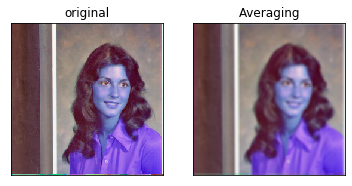

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('standard_test_images\\standard_test_images\\1.tiff')
kernel=np.ones((5,5),np.float32)/25
dst=cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('original')
plt.xticks([])
plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]),plt.yticks([])
plt.show()

### Image Blurring (Image Smoothing)
- Image blurring is achieved by convolving the image with a low-pass filter kernel. 
- It is useful for removing noise. 
- It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. 
- OpenCV provides mainly four types of blurring techniques.

#### Averaging

- This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or cv2.boxFilter().

In [4]:
img=cv2.imread('standard_test_images\\standard_test_images\\1.tiff')
blur=cv2.blur(img,(5,5))
cv2.imshow('img',img)
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Gaussian filtering
- instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur().<br><br>
- We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.<br><br>
- If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel().

In [9]:
blur=cv2.GaussianBlur(img,(5,5),0)
blur1=cv2.GaussianBlur(img,(5,5),8)
cv2.imshow('blur1',blur1)
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Median filtering
- cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise.
- Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image.
- This reduces the noise effectively.
- The kernel size must be a positive odd integer.
- 50% noise to our original image and use a median filter.


In [10]:
median=cv2.medianBlur(img,5)
cv2.imshow("img",img)
cv2.imshow("median",median)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### Bilateral Filtering
- cv2.bilateralFilter(), which was defined for, and is highly effective at noise removal while preserving edges
- the operation is slower compared to other filters.
- We already saw that a Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average. 
- This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. 
- It does not consider whether pixels have almost the same intensity value and does not consider whether the pixel lies on an edge or not. - The resulting effect is that Gaussian filters tend to blur edges, which is undesirable.
- bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences.
- The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value.
- preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

In [11]:
blur=cv2.bilateralFilter(img,9,75,75)
cv2.imshow("bilateral",blur)
cv2.waitKey(0)
cv2.destroyAllWindows()
